<a href="https://colab.research.google.com/github/ShrekFelix/classic-DNN-models/blob/master/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

In [0]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.log_device_placement = True

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
def variables_from_scope(scope_name):
    """
    Returns a list of all trainable variables in a given scope. This is useful when
    you'd like to back-propagate only to weights in one part of the network
    (in our case, the generator or the discriminator).
    """
    return tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=scope_name)

In [0]:
def visualize_row(images, img_dim=28, cmap='gray'):
    """
    Takes in a tensor of images of given width, and displays them in a row
    in a plot, using `cmap` to map from numbers to colors.
    """
    im = np.concatenate(np.reshape(images, [-1,img_dim,img_dim]), 1)
    plt.figure()
    plt.axis('off')
    plt.imshow(im, cmap=cmap)
    plt.show()

# GAN

In [0]:
# Graph parameters
z_dimension = 32
intermediate_layer_size = 128
image_size = 784

# Training parameters
batch_size = 50
iterations = 25000

In [0]:
# Generator
def generator(z):
    hidden_layer = tf.layers.dense(z, intermediate_layer_size, name="G1", activation=tf.nn.relu)
    fake_X = tf.layers.dense(hidden_layer, image_size, name="G2", activation=tf.sigmoid)
    return fake_X
# Discriminator
def discriminator(images):
    hidden_layer = tf.layers.dense(images, intermediate_layer_size, name="D1", activation=tf.nn.relu)
    D_output = tf.layers.dense(hidden_layer, 1, name="D2", activation=tf.sigmoid)
    return D_output

In [0]:
tf.reset_default_graph()

# Placeholders
real_X = tf.placeholder(tf.float32, [None, image_size])
z = tf.placeholder(tf.float32, [None, z_dimension])

# Generator
with tf.variable_scope("generator") as scope:
    fake_X = generator(z)

# Discriminator
with tf.variable_scope("discriminator") as scope:
    d_on_fake = discriminator(fake_X)
    scope.reuse_variables()
    d_on_real = discriminator(real_X)

# Loss
g_loss = -tf.reduce_mean(tf.log(d_on_fake))
d_loss = -tf.reduce_mean(tf.log(d_on_real) + tf.log(1. - d_on_fake))

# Optimizer
optimizer = tf.train.AdamOptimizer()
d_step = optimizer.minimize(d_loss, var_list=variables_from_scope("discriminator"))
g_step = optimizer.minimize(g_loss, var_list=variables_from_scope("generator"))

# Initializer
initialize_all = tf.global_variables_initializer()

Iter [       0] Time [0.0900] d_loss [1.3845]


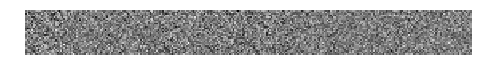

Iter [    1000] Time [4.5000] d_loss [0.0065]


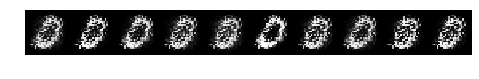

Iter [    2000] Time [8.8787] d_loss [0.0466]


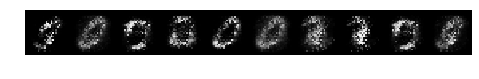

Iter [    3000] Time [13.2883] d_loss [0.1781]


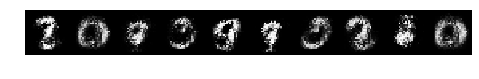

Iter [    4000] Time [17.6694] d_loss [0.2271]


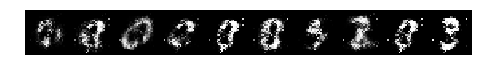

Iter [    5000] Time [21.9879] d_loss [0.4064]


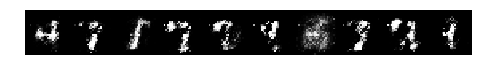

Iter [    6000] Time [26.3772] d_loss [0.3917]


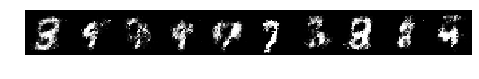

Iter [    7000] Time [30.9594] d_loss [0.3780]


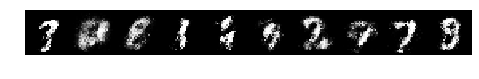

Iter [    8000] Time [35.3495] d_loss [0.3744]


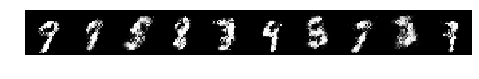

Iter [    9000] Time [39.7274] d_loss [0.4153]


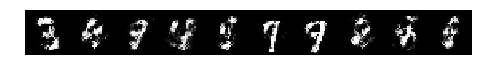

Iter [   10000] Time [44.0220] d_loss [0.6525]


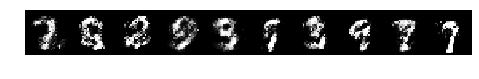

Iter [   11000] Time [48.4670] d_loss [0.8496]


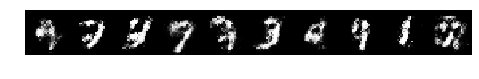

Iter [   12000] Time [52.8267] d_loss [0.9825]


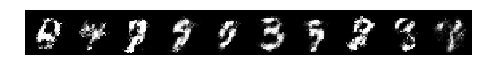

Iter [   13000] Time [57.1870] d_loss [0.5033]


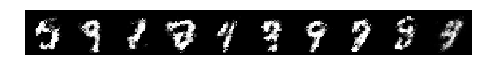

Iter [   14000] Time [61.5687] d_loss [0.8945]


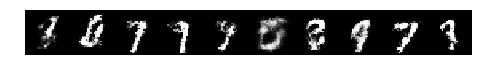

Iter [   15000] Time [65.9401] d_loss [0.7304]


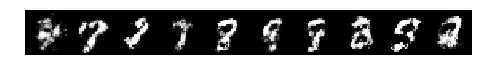

Iter [   16000] Time [70.2550] d_loss [0.8378]


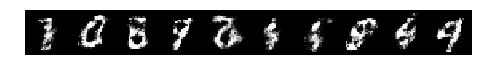

Iter [   17000] Time [74.6782] d_loss [0.8506]


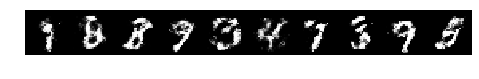

Iter [   18000] Time [79.1052] d_loss [0.6473]


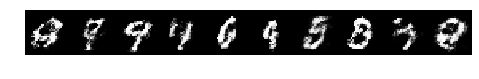

Iter [   19000] Time [83.4893] d_loss [0.9306]


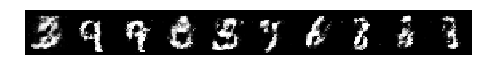

Iter [   20000] Time [87.8600] d_loss [0.7556]


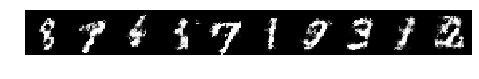

Iter [   21000] Time [92.1512] d_loss [0.8235]


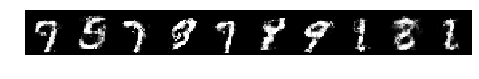

Iter [   22000] Time [96.5391] d_loss [0.7900]


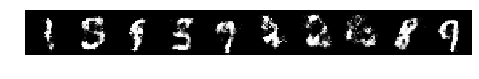

Iter [   23000] Time [100.9553] d_loss [0.8786]


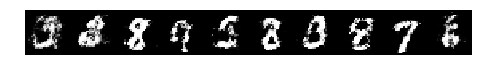

Iter [   24000] Time [105.3320] d_loss [0.8784]


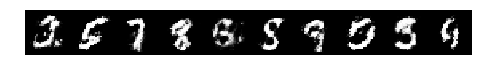

Iter [   24999] Time [109.6908] d_loss [0.8171]


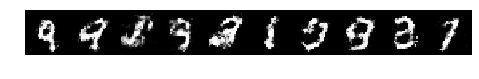

In [0]:
# Train the GAN.
def make_noise():
    return np.random.uniform(-1.0, 1.0, [batch_size, z_dimension])

def next_feed_dict():
    return {real_X: mnist.train.next_batch(batch_size)[0],
            z:      make_noise()}

sess = tf.Session()
sess.run(initialize_all)

start_time = time.time()
for t in range(iterations):
    sess.run(g_step, feed_dict=next_feed_dict())
    _, loss = sess.run([d_step, d_loss], feed_dict=next_feed_dict())

    if t % 1000 == 0 or t+1 == iterations:
        fake_data = sess.run(fake_X, feed_dict={z: make_noise()})
        print('Iter [%8d] Time [%5.4f] d_loss [%.4f]' % (t, time.time() - start_time, loss))
        visualize_row(fake_data[:10])

# conditional GAN

In [0]:
# Graph parameters
z_dimension = 32
y_dim = 10
intermediate_layer_size = 128
image_size = 784

# Training parameters
batch_size = 50
iterations = 25000

# Generator
def generator(z, y):
    inputs = tf.concat(axis=1, values=[z, y], name='G0')
    hidden_layer = tf.layers.dense(inputs, intermediate_layer_size, name="G1", activation=tf.nn.relu)
    fake_X = tf.layers.dense(hidden_layer, image_size, name="G2", activation=tf.sigmoid)
    return fake_X
  
# Discriminator
def discriminator(images, y):
    inputs = tf.concat(axis=1, values=[images, y], name='D0')
    hidden_layer = tf.layers.dense(inputs, intermediate_layer_size, name="D1", activation=tf.nn.relu)
    D_output = tf.layers.dense(hidden_layer, 1, name="D2", activation=tf.sigmoid)
    return D_output
  
tf.reset_default_graph()

# Placeholders
real_X = tf.placeholder(tf.float32, [None, image_size])
z = tf.placeholder(tf.float32, [None, z_dimension])
y = tf.placeholder(tf.float32, shape=[None, y_dim], name='y')

# Generator
with tf.variable_scope("generator") as scope:
    fake_X = generator(z, y)

# Discriminator
with tf.variable_scope("discriminator") as scope:
    d_on_fake = discriminator(fake_X, y)
    scope.reuse_variables()
    d_on_real = discriminator(real_X, y)

# Loss
g_loss = -tf.reduce_mean(tf.log(d_on_fake))
d_loss = -tf.reduce_mean(tf.log(d_on_real) + tf.log(1. - d_on_fake))

# Optimizer
optimizer = tf.train.AdamOptimizer()
d_step = optimizer.minimize(d_loss, var_list=variables_from_scope("discriminator"))
g_step = optimizer.minimize(g_loss, var_list=variables_from_scope("generator"))

# Initializer
initialize_all = tf.global_variables_initializer()

def make_noise():
    return np.random.uniform(-1.0, 1.0, [batch_size, z_dimension])

def next_feed_dict():
    image,label = mnist.train.next_batch(batch_size)
    return {real_X: image,
            y: label,
            z: make_noise()}


##(c)

Iter [       0] Time [0.0937] d_loss [1.3564]


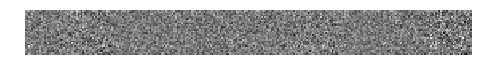

Iter [    1000] Time [4.9487] d_loss [0.0546]


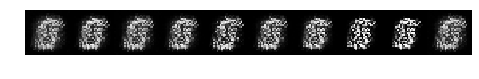

Iter [    2000] Time [9.7168] d_loss [0.1651]


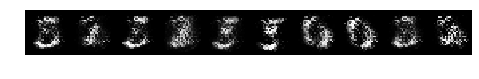

Iter [    3000] Time [14.5367] d_loss [0.0641]


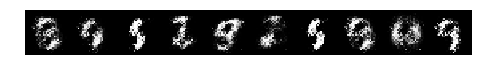

Iter [    4000] Time [19.3663] d_loss [0.1913]


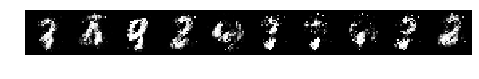

Iter [    5000] Time [24.2307] d_loss [0.2753]


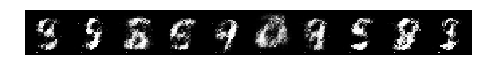

Iter [    6000] Time [29.0463] d_loss [0.3114]


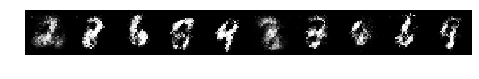

Iter [    7000] Time [33.8835] d_loss [0.1922]


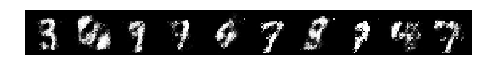

Iter [    8000] Time [38.6640] d_loss [0.4083]


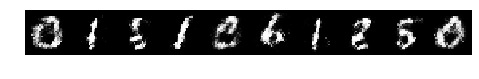

Iter [    9000] Time [43.6735] d_loss [0.7976]


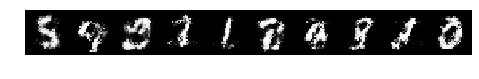

Iter [   10000] Time [48.5538] d_loss [0.5984]


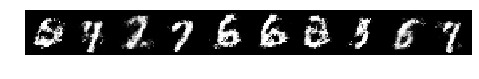

Iter [   11000] Time [53.4177] d_loss [0.8667]


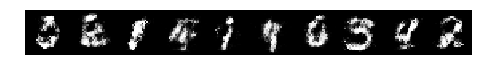

Iter [   12000] Time [58.2507] d_loss [0.7339]


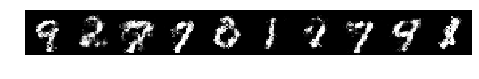

Iter [   13000] Time [62.9989] d_loss [0.8837]


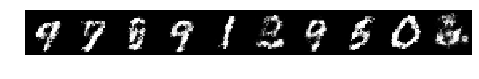

Iter [   14000] Time [67.8156] d_loss [0.9269]


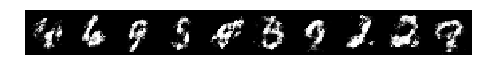

Iter [   15000] Time [72.6250] d_loss [0.8086]


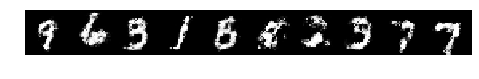

Iter [   16000] Time [77.4572] d_loss [0.9570]


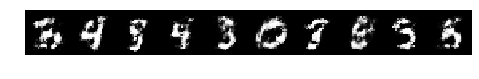

Iter [   17000] Time [82.3375] d_loss [0.9162]


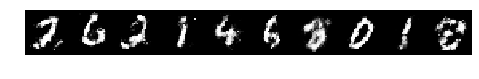

Iter [   18000] Time [87.1663] d_loss [0.9500]


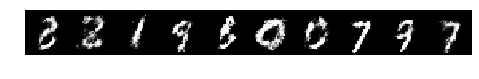

Iter [   19000] Time [91.9081] d_loss [0.9507]


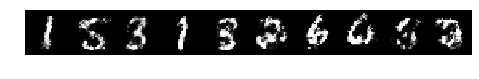

Iter [   20000] Time [96.7614] d_loss [1.0992]


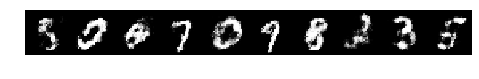

Iter [   21000] Time [101.5977] d_loss [1.0396]


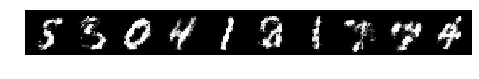

Iter [   22000] Time [106.4528] d_loss [0.7683]


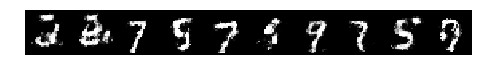

Iter [   23000] Time [111.2881] d_loss [0.8384]


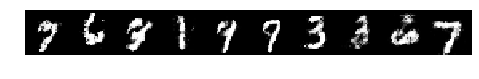

Iter [   24000] Time [116.0334] d_loss [0.8767]


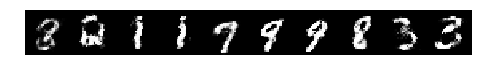

Iter [   24999] Time [120.8667] d_loss [0.8415]


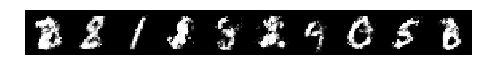

In [0]:
# Train the GAN.
sess = tf.Session()
sess.run(initialize_all)

start_time = time.time()
for t in range(iterations):
    sess.run(g_step, feed_dict=next_feed_dict())
    _, loss = sess.run([d_step, d_loss], feed_dict=next_feed_dict())

    if t % 1000 == 0 or t+1 == iterations:
        fake_data = sess.run(fake_X, feed_dict=next_feed_dict())
        print('Iter [%8d] Time [%5.4f] d_loss [%.4f]' % (t, time.time() - start_time, loss))
        visualize_row(fake_data[:10])